In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('./house_price.csv')

df

,bedrooms,sq_meter,neighborhood,sales_price
0,3,200,Normalville,250000
1,2,80,Cool Town,300000
2,2,85,Normalville,150000
3,1,55,Normalville,78000
4,4,200,Skid Row,150000


In [4]:
df.head(2)

,bedrooms,sq_meter,neighborhood,sales_price
0,3,200,Normalville,250000
1,2,80,Cool Town,300000


In [9]:
#average sales price
sales_price_avg = df['sales_price'].mean()
print(f'Average sales price is ${sales_price_avg:.2f}')

Average sales price is $185600.00


In [46]:
#aggregating statistics
# df_agg = df.agg(
#     {
#         'sq_meter': ['min', 'max','std', 'mean'],
#         'bedrooms':['min', 'max', 'std', 'mean'],
#     }
# )
# print(df_agg.round(2))

#or

df.describe().round(2)

,bedrooms,sq_meter,sales_price,price_per_sq_meter
count,5.00,5.0,5.0,5.00
mean,2.40,124.0,185600.0,1786.58
std,1.14,70.3,88525.7,1156.90
min,1.00,55.0,78000.0,750.00
25%,2.00,80.0,150000.0,1250.00
50%,2.00,85.0,150000.0,1418.18
75%,3.00,200.0,250000.0,1764.71
max,4.00,200.0,300000.0,3750.00


In [23]:
#filter by room size
room_size = 2

filter_by_room = df[df['bedrooms'] > room_size]

filter_by_room


,bedrooms,sq_meter,neighborhood,sales_price
0,3,200,Normalville,250000
4,4,200,Skid Row,150000


In [29]:
#sort method
sort_by = 'sales_price'

if sort_by in df.columns:
    sorted_df = df.sort_values(by=sort_by).head()
else:
    raise ValueError(f"Column '{sort_by}' does not exist in DataFrame.")

sorted_df


,bedrooms,sq_meter,neighborhood,sales_price
3,1,55,Normalville,78000
2,2,85,Normalville,150000
4,4,200,Skid Row,150000
0,3,200,Normalville,250000
1,2,80,Cool Town,300000


In [32]:
#add new column

df['price_per_sq_meter'] = df['sales_price'] / df['sq_meter']

df.head().round(2)

,bedrooms,sq_meter,neighborhood,sales_price,price_per_sq_meter
0,3,200,Normalville,250000,1250.00
1,2,80,Cool Town,300000,3750.00
2,2,85,Normalville,150000,1764.71
3,1,55,Normalville,78000,1418.18
4,4,200,Skid Row,150000,750.00


In [48]:
#group by and calculate average sales price per neighborhood
grouped_by = 'neighborhood'

average_sales_price = df.groupby(grouped_by)['sales_price'].mean().reset_index()

average_sales_price.round(2)

,neighborhood,sales_price
0,Cool Town,300000.00
1,Normalville,159333.33
2,Skid Row,150000.00


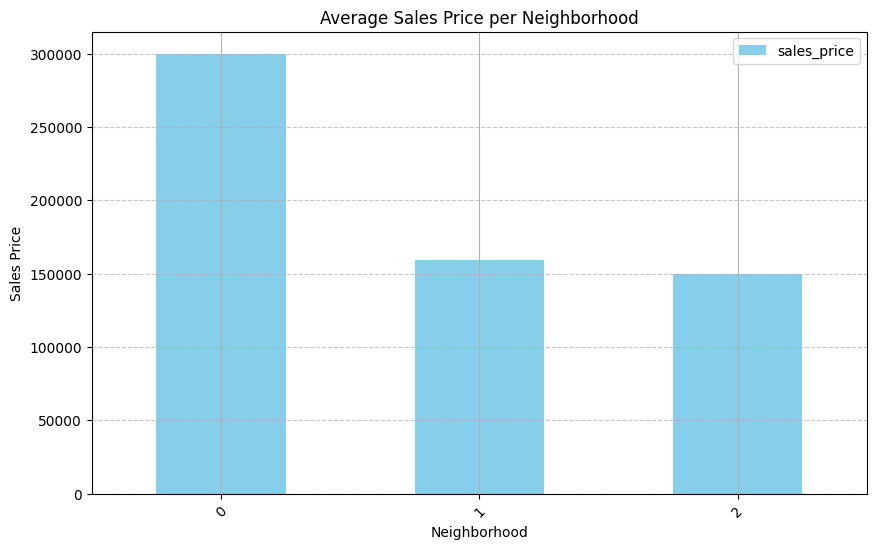

In [49]:
average_sales_price.plot(kind='bar', color='skyblue', figsize=(10, 6), grid=True, rot=45)
plt.title('Average Sales Price per Neighborhood')
plt.xlabel('Neighborhood')
plt.ylabel('Sales Price')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()

In [51]:
#house with max sales price
max_sales_price = df[df['sales_price'] == df['sales_price'].max()]

max_sales_price

,bedrooms,sq_meter,neighborhood,sales_price,price_per_sq_meter
1,2,80,Cool Town,300000,3750.0


In [52]:
df.to_csv('./lab1/house_price_per_sq_meter.csv')